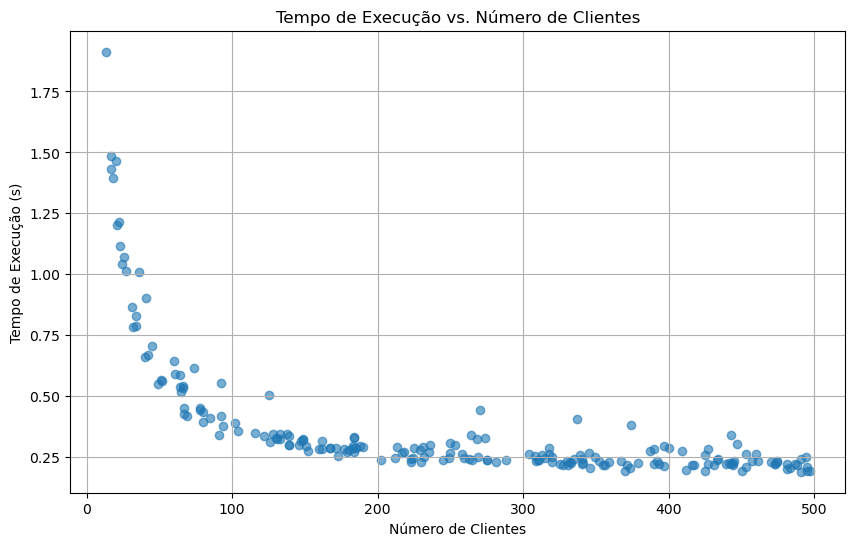

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define o caminho para o diretório de resultados
RESULTS_DIR = "data"
CLIENTS_CSV = os.path.join(RESULTS_DIR, "resultados_clientes.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(CLIENTS_CSV):
    # Lê os dados do arquivo CSV
    df_clientes = pd.read_csv(CLIENTS_CSV)

    # Cria o gráfico de dispersão (scatter plot)
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clientes['num_clientes'], df_clientes['tempo_execucao_s'], alpha=0.6)

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Número de Clientes')
    plt.xlabel('Número de Clientes')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)
    plt.show()
else:
    print(f"Arquivo não encontrado: {CLIENTS_CSV}")
    print("Execute o script executor.py primeiro.")

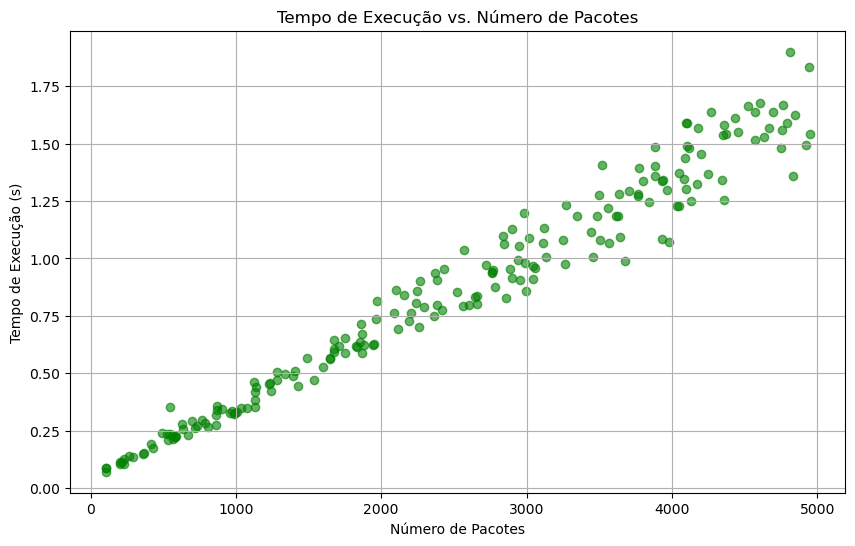

In [2]:
PACKAGES_CSV = os.path.join(RESULTS_DIR, "resultados_pacotes.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(PACKAGES_CSV):
    # Lê os dados do arquivo CSV
    df_pacotes = pd.read_csv(PACKAGES_CSV)

    # Cria o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pacotes['num_pacotes'], df_pacotes['tempo_execucao_s'], alpha=0.6, color='green')

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Número de Pacotes')
    plt.xlabel('Número de Pacotes')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)
    plt.show()
else:
    print(f"Arquivo não encontrado: {PACKAGES_CSV}")
    print("Execute o script executor.py primeiro.")

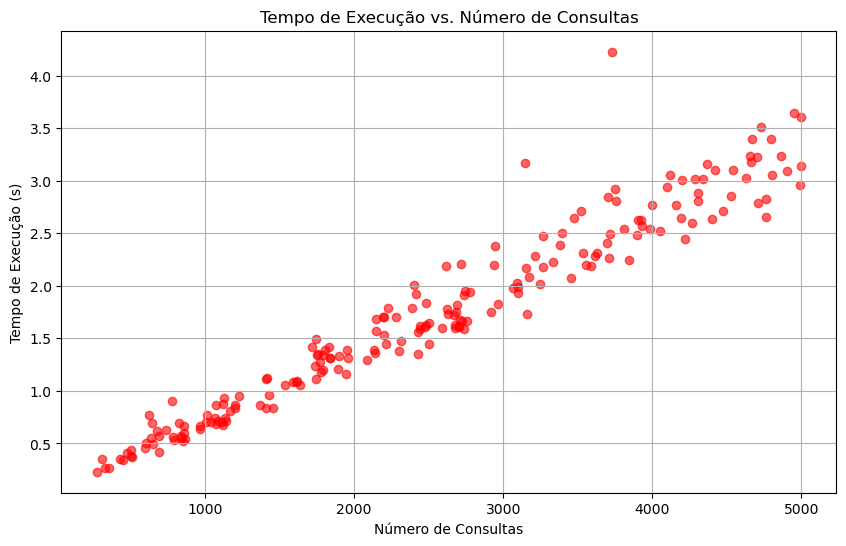

In [3]:
QUERIES_CSV = os.path.join(RESULTS_DIR, "resultados_consultas.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(QUERIES_CSV):
    # Lê os dados do arquivo CSV
    df_consultas = pd.read_csv(QUERIES_CSV)

    # Cria o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(df_consultas['num_consultas'], df_consultas['tempo_execucao_s'], alpha=0.6, color='red')

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Número de Consultas')
    plt.xlabel('Número de Consultas')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)
    plt.show()
else:
    print(f"Arquivo não encontrado: {QUERIES_CSV}")
    print("Execute o script executor.py primeiro.")

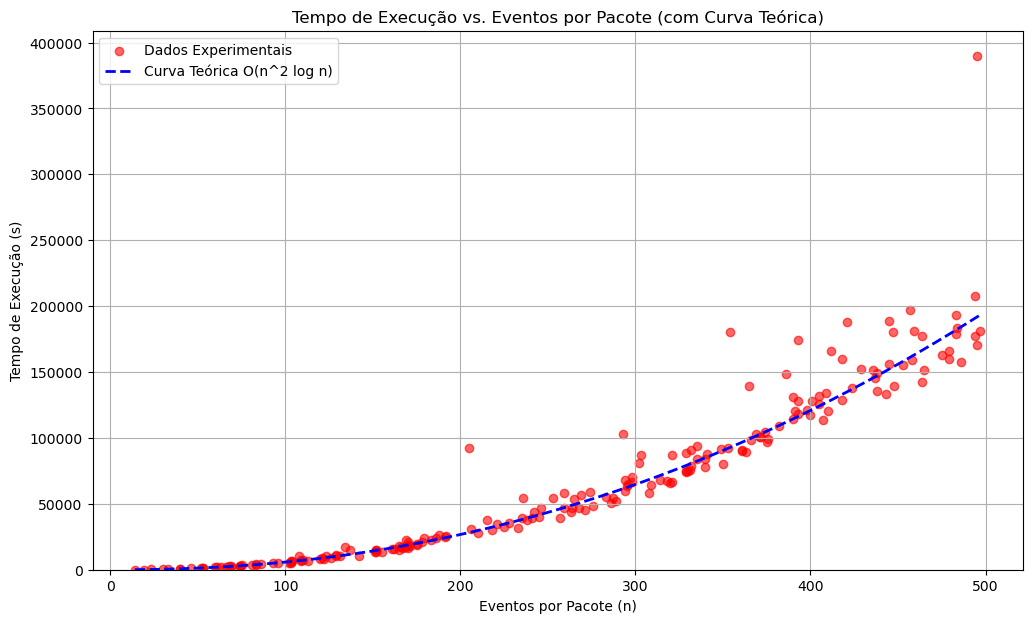

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Importa a biblioteca numpy para funções matemáticas
import os

# Define o caminho para o diretório de resultados
RESULTS_DIR = "data"
EVENTS_CSV = os.path.join(RESULTS_DIR, "resultados_eventos.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(EVENTS_CSV):
    # Lê os dados do arquivo CSV
    df_eventos = pd.read_csv(EVENTS_CSV)

    # Remove linhas onde 'eventos_por_pacote' é 0 ou 1 para evitar erros de log ou divisão por zero
    df_eventos = df_eventos[df_eventos['eventos_por_pacote'] > 1].copy()
    df_eventos = df_eventos.assign(real=df_eventos.get('tempo_execucao_s') * df_eventos.get('eventos_por_pacote')* df_eventos.get('eventos_por_pacote') * np.log(df_eventos.get('eventos_por_pacote')))

    # Ordena os dados pelo eixo x para a curva teórica ficar suave
    df_eventos = df_eventos.sort_values(by='eventos_por_pacote')

    # --- Plot dos Dados Experimentais ---
    plt.figure(figsize=(12, 7))
    plt.scatter(
        df_eventos['eventos_por_pacote'], 
        df_eventos['real'], 
        alpha=0.6, 
        color='red', 
        label='Dados Experimentais'
    )

    # --- Plot da Curva Teórica O(n log n) ---
    
    # CORREÇÃO: Cálculo dinâmico do fator de escala para um ajuste automático.
    # 1. Calcula a relação y / (n * log(n)) para cada ponto.
    #    Isso nos dá uma estimativa do fator de escala 'c' para cada medida.
    n_log_n = df_eventos['eventos_por_pacote'] *df_eventos['eventos_por_pacote'] * np.log2(df_eventos['eventos_por_pacote'])
    fatores_escala = df_eventos['real'] / n_log_n
    
    # 2. Usa a mediana dos fatores como o fator de escala final.
    #    A mediana é mais robusta a outliers do que a média.
    fator_escala_dinamico = fatores_escala.median()

    # 3. Cria um eixo x suave para a curva teórica.
    x_teorico = np.linspace(
        df_eventos['eventos_por_pacote'].min(), 
        df_eventos['eventos_por_pacote'].max(), 
        200
    )

    # 4. Calcula a curva teórica usando o fator de escala dinâmico.
    y_teorico = fator_escala_dinamico * x_teorico* x_teorico * np.log2(x_teorico)

    # 5. Plota a curva teórica
    plt.plot(
        x_teorico, 
        y_teorico, 
        color='blue', 
        linestyle='--', 
        linewidth=2, 
        label='Curva Teórica O(n^2 log n)'
    )

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Eventos por Pacote (com Curva Teórica)')
    plt.xlabel('Eventos por Pacote (n)')
    plt.ylabel('Tempo de Execução (s)')
    plt.legend() # Adiciona a legenda para identificar os plots
    plt.grid(True)
    plt.ylim(bottom=0) # Garante que o eixo y comece em 0 para melhor visualização
    plt.show()
else:
    print(f"Arquivo não encontrado: {EVENTS_CSV}")
    print("Execute o script executor.py primeiro.")